# Graph Summary

This notebook merges all the BEL files and gives the summary statistics.

### Notebook Setup

In [1]:
import logging
import os
import sys
import time

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from pybel_jupyter import to_jupyter # Visualize network
import matplotlib 
import pybel
import pybel_tools
from pybel_tools.utils import barh, barv
from pybel_tools.summary import plot_summary_axes

import heme_knowledge

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
matplotlib.style.use('seaborn')
#plt.style.available


In [3]:
logging.basicConfig(level=20)

### Notebook Provenance

The explicit display of time of execution and the versions of the software packages used.

In [4]:
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [5]:
time.asctime()

'Sat Jun  1 10:35:35 2019'

In [6]:
pybel.get_version()

'0.13.2'

In [7]:
pybel_tools.get_version()

'0.7.3'

# Heme Knowledge Assembly

## Loading

The compilation of the BEL scripts and allows to explore and visualize the resultant heme knowledge assembly model.

In [8]:
merged_network = heme_knowledge.get_graph()

In [9]:
merged_network.version

'0.0.1-dev'

In [10]:
# visualize the network graph
to_jupyter(merged_network)

<IPython.core.display.Javascript object>

### Contents Summary

A summary of the types of nodes and edges present in the heme knowledge model.

In [11]:
merged_network.summarize()

Heme Curation v0.0.1-dev
Number of Nodes: 784
Number of Edges: 3016
Number of Citations: 46
Number of Authors: 330
Network Density: 4.91E-03
Number of Components: 12
Number of Warnings: 0


A summary of the nodes and egdes with an elegant display using matplotlib and pybel_tools.summary in 'svg' format.

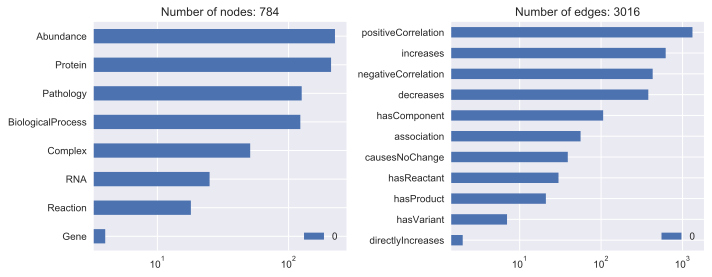

In [12]:
pybel_tools.summary.plot_summary(merged_network, plt, figsize=(10, 4))
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/plot_summary.png', dpi=300, bbox_inches='tight')
plt.show()

A summary of the namespaces used in the network can provide insight to the types of articles used. This can be produced with pybel.struct.summary.count_namespaces and plotted with matplotlib. 

Counter({'MESH': 219, 'HGNC': 114, 'MGI': 101, 'HM': 90, 'CHEBI': 83, 'GO': 55, 'HP': 29, 'PFAM': 13, 'RGD': 6, 'INTERPRO': 6, 'SCOMP': 1})


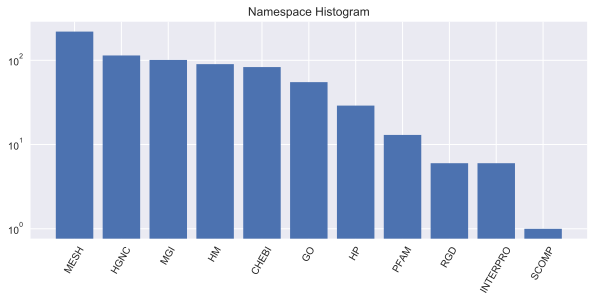

In [13]:
namespace_counter = pybel.struct.summary.count_namespaces(merged_network)
print(namespace_counter)

plt.figure(figsize=(10, 4))
barv(namespace_counter, plt, 'Namespace Histogram', rotation=60)
plt.yscale('log')
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/namespace_Histogram.png', dpi=300, bbox_inches='tight')

Likewise, a histogram of the usage of functions in the network calculated with pybel.struct.summary.count_functions.

Counter({'Abundance': 226, 'Protein': 211, 'Pathology': 126, 'BiologicalProcess': 123, 'Complex': 51, 'RNA': 25, 'Reaction': 18, 'Gene': 4})


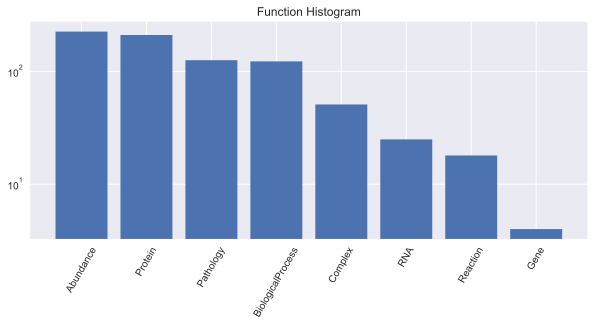

In [38]:
func_count = pybel.struct.summary.count_functions(merged_network)
print(func_count)

plt.figure(figsize=(10, 4))
barv(func_count, plt, 'Function Histogram', rotation=60)
plt.yscale('log')
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/function_Histogram.png', dpi=300, bbox_inches='tight')

Get the set of all functions that compose the the heme_knowledge graph 

In [15]:
pathologies = set()
proteins = set()
biologicalProcess = set()
abundance = set()

for node in merged_network:
    
    # All the pathology nodes in the network
    if node.function == 'Pathology':
        pathologies.add(node)
        
    # All the proteins nodes in the network
    elif node.function == 'Protein':
        proteins.add(node)
        
    # All the biological processes nodes in the network
    elif node.function == 'BiologicalProcess':
        biologicalProcess.add(node)
    
    # All the abundances nodes in the network
    elif node.function == 'Abundance':
        abundance.add(node)
        
#print(proteins)
#print(pathologies)
#print(biologicalProcess)
#print(abundance)
#print(len(proteins))

Get the set of all namespaces used in this heme graph

In [16]:
all_namespaces = pybel.struct.summary.get_namespaces(merged_network)
all_namespaces

{'CHEBI',
 'GO',
 'HGNC',
 'HM',
 'HP',
 'INTERPRO',
 'MESH',
 'MGI',
 'PFAM',
 'RGD',
 'SCOMP'}

##### Get the set of all of the names in a given namespace that are in the heme graph

In [17]:
HGNC_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "HGNC")
Scomp_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "SCOMP")
CHEBI_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "CHEBI")
GO_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "GO")
HM_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "HM")
HP_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "HP")
Interpro_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "INTERPRO")
MeSH_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "MESH")
Mgi_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "MGI")
Pfam_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "PFAM")
Rgd_namespace = pybel.struct.summary.count_names_by_namespace(merged_network, "RGD")

#Interpro_namespace
#MeSH_namespace
#Mgi_namespace
#Pfam_namespace
#Rgd_namespace
#Scomp_namespace
#HP_namespace
#GO_namespace
#CHEBI_namespace
#HGNC_namespace

In [18]:
#pybel.struct.summary.get_names_by_namespace(merged_network, "HGNC")

In [19]:
#pybel.struct.summary.count_variants(merged_network)

##### Get all names for each namespace

In [20]:
#pybel.struct.summary.get_names(merged_network)

##### Count the number of edges in which each pathology is happening

In [21]:
#pybel.struct.summary.count_pathologies(merged_network)

#####  Get the top highest relationship-having edges in the heme graph 

In [22]:
"""Returns the top connected pathology nodes"""
path_nodes = pybel.struct.summary.get_top_pathologies(merged_network, 10)
path_nodes

[(<BEL path(MESH:Hemolysis)>, 205),
 (<BEL path(MESH:Thrombosis)>, 122),
 (<BEL path(MESH:Inflammation)>, 94),
 (<BEL path(MESH:"Porphyria, Erythropoietic")>, 66),
 (<BEL path(MESH:Anemia)>, 44),
 (<BEL path(HM:"vaso-occlusive crisis")>, 34),
 (<BEL path(MESH:Hematoma)>, 32),
 (<BEL path(HP:"Paroxysmal nocturnal hemoglobinuria")>, 29),
 (<BEL path(MESH:"Disseminated Intravascular Coagulation")>, 23),
 (<BEL path(MESH:"Vascular System Injuries")>, 21)]

In [23]:
"""Returns a list of top high-degree nodes, where n = int"""
#pybel.struct.summary.get_top_hubs(merged_network,20)

'Returns a list of top high-degree nodes, where n = int'

### Get the annotations

A histogram of the usage of annotations in the network that can quickly summarize the information content contained within the graph.

In [24]:
pybel.struct.summary.get_annotations(merged_network)  #returns a set of all annotations

{'Cell',
 'Concentration',
 'MeSHAnatomy',
 'MeSHDisease',
 'Species',
 'TextLocation',
 'TimePoint'}

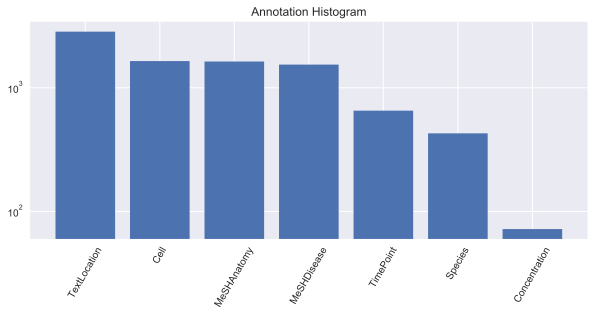

In [41]:
'''Give the count for how many times each annotation is used in the graph'''

annotation_counter = pybel.struct.summary.count_annotations(merged_network)

plt.figure(figsize=(10, 4))
barv(annotation_counter, plt, 'Annotation Histogram', rotation=60)
plt.yscale('log')
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/Annotation_Histogram.png', dpi=300, bbox_inches='tight')

In [26]:
annotation_counter

Counter({'TextLocation': 2842,
         'Cell': 1643,
         'MeSHDisease': 1539,
         'MeSHAnatomy': 1630,
         'TimePoint': 653,
         'Species': 428,
         'Concentration': 72})

In [27]:
'''Get all values for the given annotation. Returns a dictionary of key/value {annotation key:set of annotation values}'''

#pybel.struct.summary.get_annotation_values(merged_network, "MeSHAnatomy")
#pybel_tools.summary.count_annotation_values(merged_network, 'Cell')

'Get all values for the given annotation. Returns a dictionary of key/value {annotation key:set of annotation values}'

Likewise, a relationship histogram displaying a part of information contained in the edges in the graph.

In [28]:
relation_count = pybel.struct.summary.count_relations(merged_network)  # Returns a counter from {relation type: frequency}

Counter({'positiveCorrelation': 1324, 'increases': 621, 'negativeCorrelation': 430, 'decreases': 380, 'hasComponent': 106, 'association': 56, 'causesNoChange': 39, 'hasReactant': 30, 'hasProduct': 21, 'hasVariant': 7, 'directlyIncreases': 2})


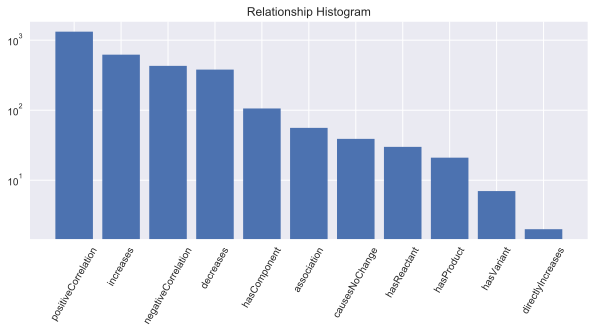

In [29]:
relation_count = pybel.struct.summary.count_relations(merged_network)
print(relation_count)

plt.figure(figsize=(10, 4))
barv(relation_count, plt, 'Relationship Histogram', rotation=60)
plt.yscale('log')
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/Relationship_Histogram.png', dpi=300, bbox_inches='tight')

Counter({'positiveCorrelation': 1032, 'increases': 479, 'negativeCorrelation': 358, 'decreases': 306, 'hasComponent': 106, 'association': 56, 'causesNoChange': 39, 'hasReactant': 30, 'hasProduct': 21, 'hasVariant': 7, 'directlyIncreases': 2})


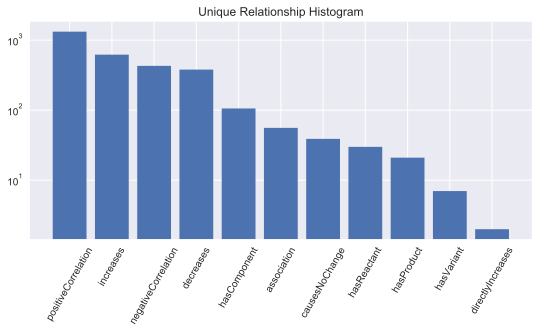

In [30]:
unique_rel = pybel_tools.summary.count_unique_relations(merged_network) #Counts each type of edge once for each pair of nodes
print(unique_rel)

plt.figure(figsize=(9, 4))
barv(relation_count, plt, 'Unique Relationship Histogram', rotation=60)
plt.yscale('log')
plt.savefig('C:/Users/syedf/OneDrive/Thesis/ThesisLatex_Farah/img/Unique_Relationship_Histogram.png', dpi=300, bbox_inches='tight')